In [19]:
# Packages

import selfies as sf
import pathlib as Path
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import re
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa


In [20]:
#  Loading df_mofs_v1 generated from MOF_data_curation.ipynb

df_mofs_v1 = pd.read_csv(r"C:\Users\dalja\OneDrive\Desktop\APS360 Project\MOF_processed data\df_mofs_v1.csv")

In [21]:
# checking column names

df_mofs_v1.columns

Index(['MOFid', 'metal', 'linker', 'logKH_CO2', 'pure_uptake_CO2_298.00_15000',
       'pure_uptake_methane_298.00_6500000', 'LCD', 'PLD', 'LFPD', 'cm3_g',
       'ASA_m2_cm3', 'ASA_m2_g', 'NASA_m2_cm3', 'NASA_m2_g', 'AV_VF',
       'AV_cm3_g', 'NAV_cm3_g', 'All_Metals', 'Has_OMS', 'Open_Metal_Sites'],
      dtype='object')

In [22]:
# Standardizing numerical columns of df_mofs_v1 (converting it to df_mofs_v2) and saving the scaler
df_mofs_v2 = df_mofs_v1.copy()

num_cols = df_mofs_v2.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
scaled = scaler.fit_transform(df_mofs_v2[num_cols])
df_mofs_v2.loc[:, num_cols] = pd.DataFrame(
    scaled, columns=num_cols, index=df_mofs_v2.index
)

joblib.dump(scaler, 'df_mofs_v2_scaler.pkl')

['df_mofs_v2_scaler.pkl']

In [23]:
# Saving df_mofs_v2 -> numbers are standardized

df_mofs_v2

,MOFid,metal,linker,logKH_CO2,pure_uptake_CO2_298.00_15000,pure_uptake_methane_298.00_6500000,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,All_Metals,Has_OMS,Open_Metal_Sites
0,ABAYIO_clean,[Mn],[C][Branch1][=Branch1][C][=Branch1][C][=O][OH0...,-0.892264,-1.007983,0.466247,1.220537,-0.257156,1.244893,-0.718094,0.326221,0.223101,1.034618,1.588464,0.888109,0.304844,-0.025221,Mn,No,
1,ABAYOU_clean,[Co],[C][=Branch1][C][=O][Branch2][Ring1][#Branch1]...,-0.923222,-1.023628,0.448778,1.186252,-0.177289,1.244705,-0.655995,0.368455,0.214229,1.069828,1.572040,0.889890,0.261434,-0.025221,Co,No,
2,ABETIN_clean,[Cu],[C][=C][C][=Branch1][=Branch1][=C][C][=N][Ring...,-1.120953,-1.058636,2.415519,0.678191,1.234452,0.717359,-1.443093,1.357734,2.098017,-0.472329,-0.431001,1.480895,1.370895,-0.025221,Cu,No,
3,ABEXEM_clean,[La],[O][=C][Branch1][C][OH0][C][=N][C][=N][C][=Bra...,0.434159,0.495065,-0.778622,-0.635781,-0.333242,-0.629319,0.954224,-0.233741,-0.553608,-0.459275,-0.421572,-0.621446,-0.547676,-0.025221,La,Yes,La
4,ABEXIQ_clean,[Ce],[OH0][C][=Branch1][C][=O][C][=N][C][=N][C][=Br...,1.785491,0.851859,-0.793555,-0.640171,-0.364807,-0.628908,1.009398,-0.250902,-0.566724,-0.431300,-0.401808,-0.767417,-0.574919,-0.025221,Ce,Yes,Ce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,ZURLAB_clean,[Cd],[C][=Branch2][Ring1][#Branch2][=N][C][=Branch1...,-0.900400,-0.981607,-0.920997,-0.615294,-0.915743,-0.603953,0.586835,-1.413214,-1.001030,1.053761,0.795584,-1.207111,-0.567974,-0.025221,Cd,No,
3329,ZURQOS_clean,[Ni][Cd],[C][Branch1][=N][C][=C][C][=C][Branch1][Ring1]...,0.283358,1.050526,-0.298322,-0.691467,-0.526142,-0.684093,0.017538,0.150528,-0.201369,-0.472329,-0.431001,-0.336624,-0.298917,-0.025221,"Cd,Ni",Yes,Ni
3330,ZURROT_clean,[Ni][Cd],[C][Branch1][=N][C][=C][C][=C][Branch1][Ring1]...,0.215964,2.129018,-0.147762,-0.611149,-0.427538,-0.599136,-0.453113,0.479512,0.172023,-0.472329,-0.431001,0.419934,0.035528,-0.025221,"Cd,Ni",Yes,"Cd,Ni"
3331,ZUSBOG_clean,[Zn],[C][=Branch1][C][=O][Branch2][Ring1][Branch2][...,-0.169542,0.316282,-0.060325,-0.624265,-0.625144,-0.614972,-0.267523,0.006720,-0.188878,-0.472329,-0.431001,0.227679,-0.091193,-0.025221,Zn,Yes,Zn


In [24]:
# Help functions

def parse_metal_string(metal_str):

    metals = re.findall(r'\[([^\]]+)\]', metal_str)
    
    return metals

def build_metal_vocabulary(df, metal_column='metal'):

    all_metals = set()
    max_metals = 0
    
    for metal_str in df[metal_column]:
        metals = parse_metal_string(str(metal_str))
        all_metals.update(metals)
        max_metals = max(max_metals, len(metals))
    
    # Create vocabulary with padding token
    unique_metals = sorted(all_metals)
    unique_metals_with_padding = ['[nop]'] + unique_metals
    metal_to_idx = {metal: i for i, metal in enumerate(unique_metals_with_padding)}
    
    print(f"Found {len(unique_metals)} unique metals")
    print(f"Vocabulary size: {len(metal_to_idx)} (including padding)")
    print(f"Maximum metals per MOF: {max_metals}")
    
    return metal_to_idx, max_metals

def encode_metals(df, metal_to_idx, max_length, metal_column='metal', oms_column='Open_Metal_Sites'):
    """
    Convert metal strings to integer sequences with OMS flags.
    
    Args:
        df: DataFrame with metal and OMS columns
        metal_to_idx: Metal vocabulary dictionary
        max_length: Sequence length (pad/truncate to this)
        metal_column: Name of metal column
        oms_column: Name of Open Metal Sites column
    
    Returns:
        metal_ids: Array of shape (n_mofs, max_length)
        metal_oms_flags: Array of shape (n_mofs, max_length)
    """
    n_mofs = len(df)
    metal_ids = np.zeros((n_mofs, max_length), dtype=np.int32)
    metal_oms_flags = np.zeros((n_mofs, max_length), dtype=np.float32)
    
    for i, row in df.iterrows():
        # Parse metals
        metals = parse_metal_string(str(row[metal_column]))
        
        # Convert to IDs (truncate if too long)
        for j, metal in enumerate(metals[:max_length]):
            metal_ids[i, j] = metal_to_idx.get(metal, 0)
        
        # Parse OMS
        oms_str = str(row[oms_column])
        if oms_str and oms_str != 'nan' and oms_str.strip():
            oms_metals = [m.strip() for m in oms_str.replace('[', '').replace(']', '').split(',')]
            
            # Set OMS flags
            for j, metal in enumerate(metals[:max_length]):
                if metal in oms_metals:
                    metal_oms_flags[i, j] = 1.0
    
    return metal_ids, metal_oms_flags

def encode_linker(df, linker_column='linker'):
    linkers = df[linker_column].tolist()

    # Build vocabulary
    linker_vocab = sf.get_alphabet_from_selfies(linkers)
    linker_vocab = list(sorted(linker_vocab))
    linker_vocab = ['[nop]'] + linker_vocab

    # Determine padding length
    pad_to_len = max(sf.len_selfies(s) for s in linkers)
    
    # Create symbol to index mapping
    symbol_to_idx = {s: i for i, s in enumerate(linker_vocab)}

    print(f"Linker vocabulary size: {len(linker_vocab)}")
    print(f"Padding length: {pad_to_len}")
    
    # Encode each linker
    linker_ids = []
    for linker in linkers:
        # enc_type="label" returns only label (not tuple)
        label = sf.selfies_to_encoding(
            selfies=linker,
            vocab_stoi=symbol_to_idx,
            pad_to_len=pad_to_len,
            enc_type="label"
        )
        linker_ids.append(label)
    
    linker_ids = np.array(linker_ids)

    return linker_ids, symbol_to_idx

def plot_feature_distributions(df, columns=None, figsize=(15, 10)):
    """
    데이터셋의 특성 분포 시각화
    
    Args:
        df: DataFrame
        columns: 시각화할 컬럼 리스트 (None이면 모든 숫자형 컬럼)
        figsize: Figure 크기
    """
    # 숫자형 컬럼만 선택
    if columns is None:
        columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    n_cols = len(columns)
    n_rows = (n_cols + 2) // 3  # 3열 그리드
    
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        # Histogram + KDE
        axes[i].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{col}', fontsize=10)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(alpha=0.3)
    
    # 빈 subplot 제거
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


In [25]:
# Metal encoding

# Building metal vocabulary
metal_vocab, max_metals = build_metal_vocabulary(df_mofs_v2, metal_column='metal')

# Encoding metals and its open metal site
metal_ids, metal_oms_flags = encode_metals(
    df_mofs_v2, 
    metal_vocab, 
    max_length=max_metals,  # Or set fixed length like 5
    metal_column='metal',
    oms_column='Open_Metal_Sites'
)

Found 54 unique metals
Vocabulary size: 55 (including padding)
Maximum metals per MOF: 5


In [26]:
# Metal vocabulary

print(metal_vocab)

joblib.dump(metal_vocab, 'metal_vocabulary.pkl')

{'[nop]': 0, 'Ag': 1, 'Al': 2, 'Au': 3, 'Ba': 4, 'Be': 5, 'Bi': 6, 'Ca': 7, 'Cd': 8, 'Ce': 9, 'Co': 10, 'Cr': 11, 'Cs': 12, 'Cu': 13, 'Dy': 14, 'Er': 15, 'Eu': 16, 'Fe': 17, 'Ga': 18, 'Gd': 19, 'Hf': 20, 'Ho': 21, 'In': 22, 'Ir': 23, 'K': 24, 'La': 25, 'Li': 26, 'Lu': 27, 'Mg': 28, 'Mn': 29, 'Mo': 30, 'Na': 31, 'Nb': 32, 'Nd': 33, 'Ni': 34, 'Pb': 35, 'Pd': 36, 'Pr': 37, 'Pt': 38, 'Rb': 39, 'Re': 40, 'Rh': 41, 'Ru': 42, 'Sm': 43, 'Sn': 44, 'Sr': 45, 'Tb': 46, 'Th': 47, 'Tm': 48, 'U': 49, 'V': 50, 'W': 51, 'Y': 52, 'Yb': 53, 'Zn': 54}


['metal_vocabulary.pkl']

In [27]:
# Linker encoding

# Encoding linkers
linker_ids, linker_vocab = encode_linker(df_mofs_v2, linker_column='linker')

Linker vocabulary size: 86
Padding length: 198


In [28]:
# Linker vocabulary

print(linker_vocab)

joblib.dump(linker_vocab, 'linker_vocabulary.pkl')

{'[nop]': 0, '[#Branch1]': 1, '[#Branch2]': 2, '[#CH0]': 3, '[#C]': 4, '[#N]': 5, '[/-Ring1]': 6, '[/-Ring2]': 7, '[/Br]': 8, '[/C@@H1]': 9, '[/C@@]': 10, '[/C@H1]': 11, '[/C@]': 12, '[/CH0]': 13, '[/CH1]': 14, '[/C]': 15, '[/NH0]': 16, '[/NH1]': 17, '[/N]': 18, '[/S]': 19, '[=Branch1]': 20, '[=Branch2]': 21, '[=CH0]': 22, '[=CH1]': 23, '[=C]': 24, '[=N+1]': 25, '[=NH0]': 26, '[=N]': 27, '[=O]': 28, '[=P@]': 29, '[=P]': 30, '[=Ring1]': 31, '[=Ring2]': 32, '[=S]': 33, '[As]': 34, '[B]': 35, '[Br]': 36, '[Branch1]': 37, '[Branch2]': 38, '[C@@H1]': 39, '[C@@]': 40, '[C@H1]': 41, '[C@]': 42, '[CH0]': 43, '[CH1]': 44, '[CH2]': 45, '[CH3]': 46, '[C]': 47, '[Cl]': 48, '[F]': 49, '[Ge@@]': 50, '[Ge@]': 51, '[Ge]': 52, '[I]': 53, '[N+1]': 54, '[NH0]': 55, '[NH1]': 56, '[N]': 57, '[O-1]': 58, '[OH0]': 59, '[OH1]': 60, '[O]': 61, '[P@@]': 62, '[P@H1]': 63, '[P@]': 64, '[PH0]': 65, '[P]': 66, '[Ring1]': 67, '[Ring2]': 68, '[S@@]': 69, '[S@]': 70, '[SH0]': 71, '[S]': 72, '[Sb]': 73, '[Se]': 74, '[S

['linker_vocabulary.pkl']

In [29]:
df_mofs_v3 = df_mofs_v2.copy()
df_mofs_v3['metal_ids'] = metal_ids.tolist()
df_mofs_v3['metal_oms_flags'] = metal_oms_flags.tolist()
df_mofs_v3['linker_ids'] = linker_ids.tolist()

In [30]:
df_mofs_v3

,MOFid,metal,linker,logKH_CO2,pure_uptake_CO2_298.00_15000,pure_uptake_methane_298.00_6500000,LCD,PLD,LFPD,cm3_g,...,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,All_Metals,Has_OMS,Open_Metal_Sites,metal_ids,metal_oms_flags,linker_ids
0,ABAYIO_clean,[Mn],[C][Branch1][=Branch1][C][=Branch1][C][=O][OH0...,-0.892264,-1.007983,0.466247,1.220537,-0.257156,1.244893,-0.718094,...,1.588464,0.888109,0.304844,-0.025221,Mn,No,,"[29, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[47, 37, 20, 47, 20, 47, 28, 59, 24, 47, 37, 2..."
1,ABAYOU_clean,[Co],[C][=Branch1][C][=O][Branch2][Ring1][#Branch1]...,-0.923222,-1.023628,0.448778,1.186252,-0.177289,1.244705,-0.655995,...,1.572040,0.889890,0.261434,-0.025221,Co,No,,"[10, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[47, 20, 47, 28, 38, 67, 1, 47, 24, 47, 37, 20..."
2,ABETIN_clean,[Cu],[C][=C][C][=Branch1][=Branch1][=C][C][=N][Ring...,-1.120953,-1.058636,2.415519,0.678191,1.234452,0.717359,-1.443093,...,-0.431001,1.480895,1.370895,-0.025221,Cu,No,,"[13, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[47, 24, 47, 20, 20, 24, 47, 27, 67, 20, 47, 2..."
3,ABEXEM_clean,[La],[O][=C][Branch1][C][OH0][C][=N][C][=N][C][=Bra...,0.434159,0.495065,-0.778622,-0.635781,-0.333242,-0.629319,0.954224,...,-0.421572,-0.621446,-0.547676,-0.025221,La,Yes,La,"[25, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[61, 24, 37, 47, 59, 47, 27, 47, 27, 47, 20, 6..."
4,ABEXIQ_clean,[Ce],[OH0][C][=Branch1][C][=O][C][=N][C][=N][C][=Br...,1.785491,0.851859,-0.793555,-0.640171,-0.364807,-0.628908,1.009398,...,-0.401808,-0.767417,-0.574919,-0.025221,Ce,Yes,Ce,"[9, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[59, 47, 20, 47, 28, 47, 27, 47, 27, 47, 20, 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,ZURLAB_clean,[Cd],[C][=Branch2][Ring1][#Branch2][=N][C][=Branch1...,-0.900400,-0.981607,-0.920997,-0.615294,-0.915743,-0.603953,0.586835,...,0.795584,-1.207111,-0.567974,-0.025221,Cd,No,,"[8, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[47, 21, 67, 2, 27, 47, 20, 2, 27, 43, 67, 37,..."
3329,ZURQOS_clean,[Ni][Cd],[C][Branch1][=N][C][=C][C][=C][Branch1][Ring1]...,0.283358,1.050526,-0.298322,-0.691467,-0.526142,-0.684093,0.017538,...,-0.431001,-0.336624,-0.298917,-0.025221,"Cd,Ni",Yes,Ni,"[34, 8, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[47, 37, 27, 47, 24, 47, 24, 37, 67, 47, 56, 4..."
3330,ZURROT_clean,[Ni][Cd],[C][Branch1][=N][C][=C][C][=C][Branch1][Ring1]...,0.215964,2.129018,-0.147762,-0.611149,-0.427538,-0.599136,-0.453113,...,-0.431001,0.419934,0.035528,-0.025221,"Cd,Ni",Yes,"Cd,Ni","[34, 8, 0, 0, 0]","[1.0, 1.0, 0.0, 0.0, 0.0]","[47, 37, 27, 47, 24, 47, 24, 37, 67, 47, 57, 4..."
3331,ZUSBOG_clean,[Zn],[C][=Branch1][C][=O][Branch2][Ring1][Branch2][...,-0.169542,0.316282,-0.060325,-0.624265,-0.625144,-0.614972,-0.267523,...,-0.431001,0.227679,-0.091193,-0.025221,Zn,Yes,Zn,"[54, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[47, 20, 47, 28, 38, 67, 38, 47, 24, 47, 24, 3..."


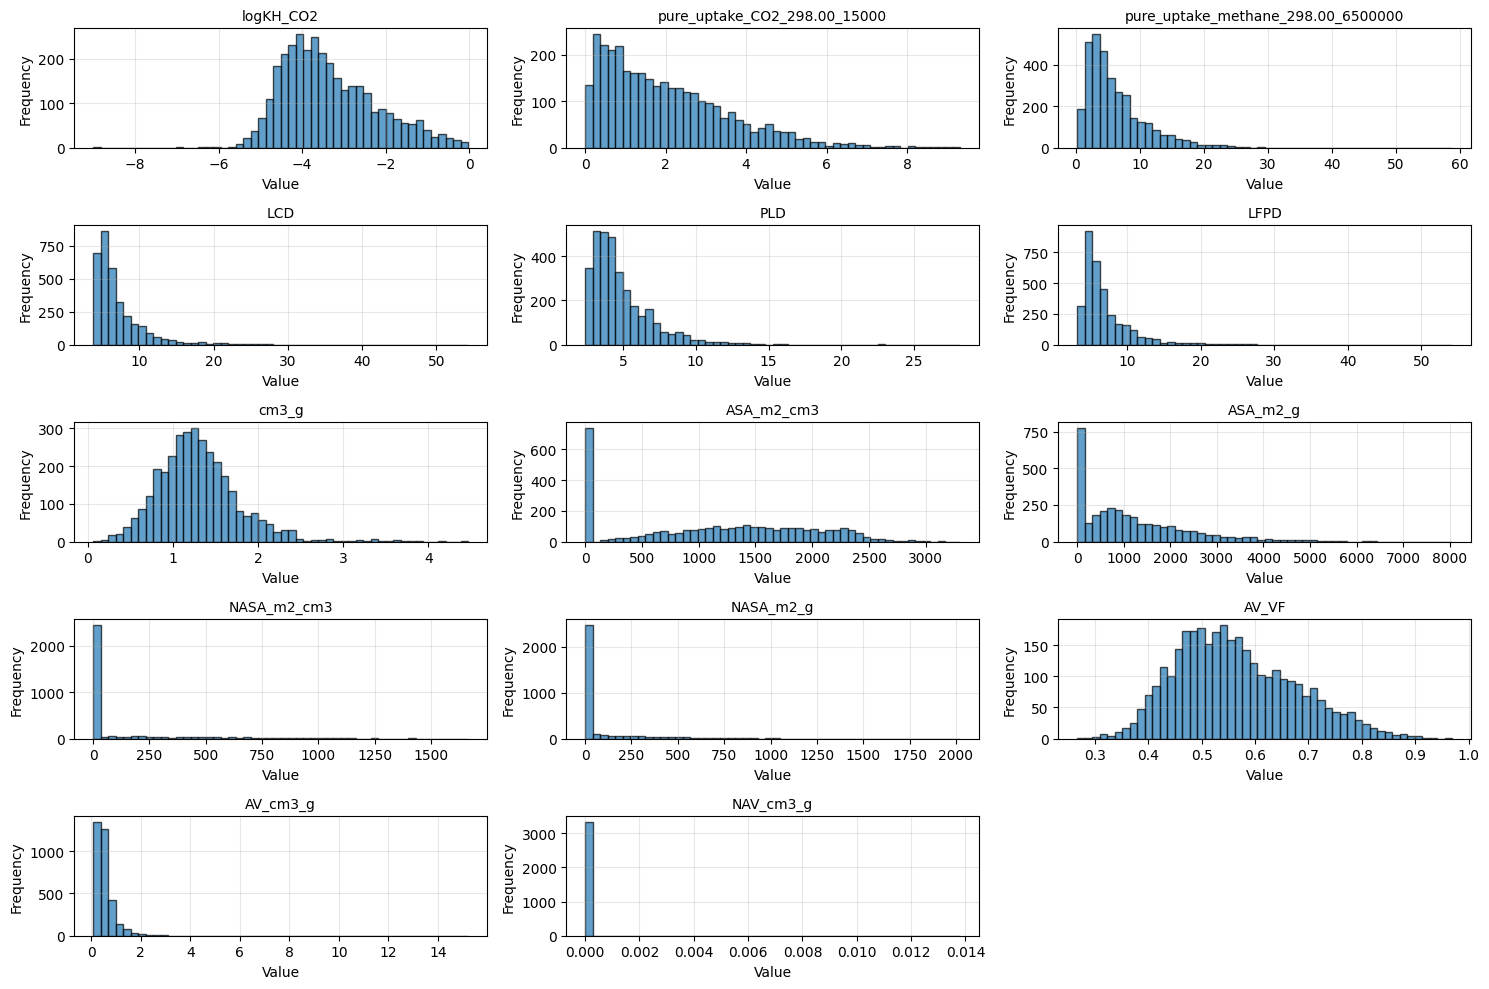

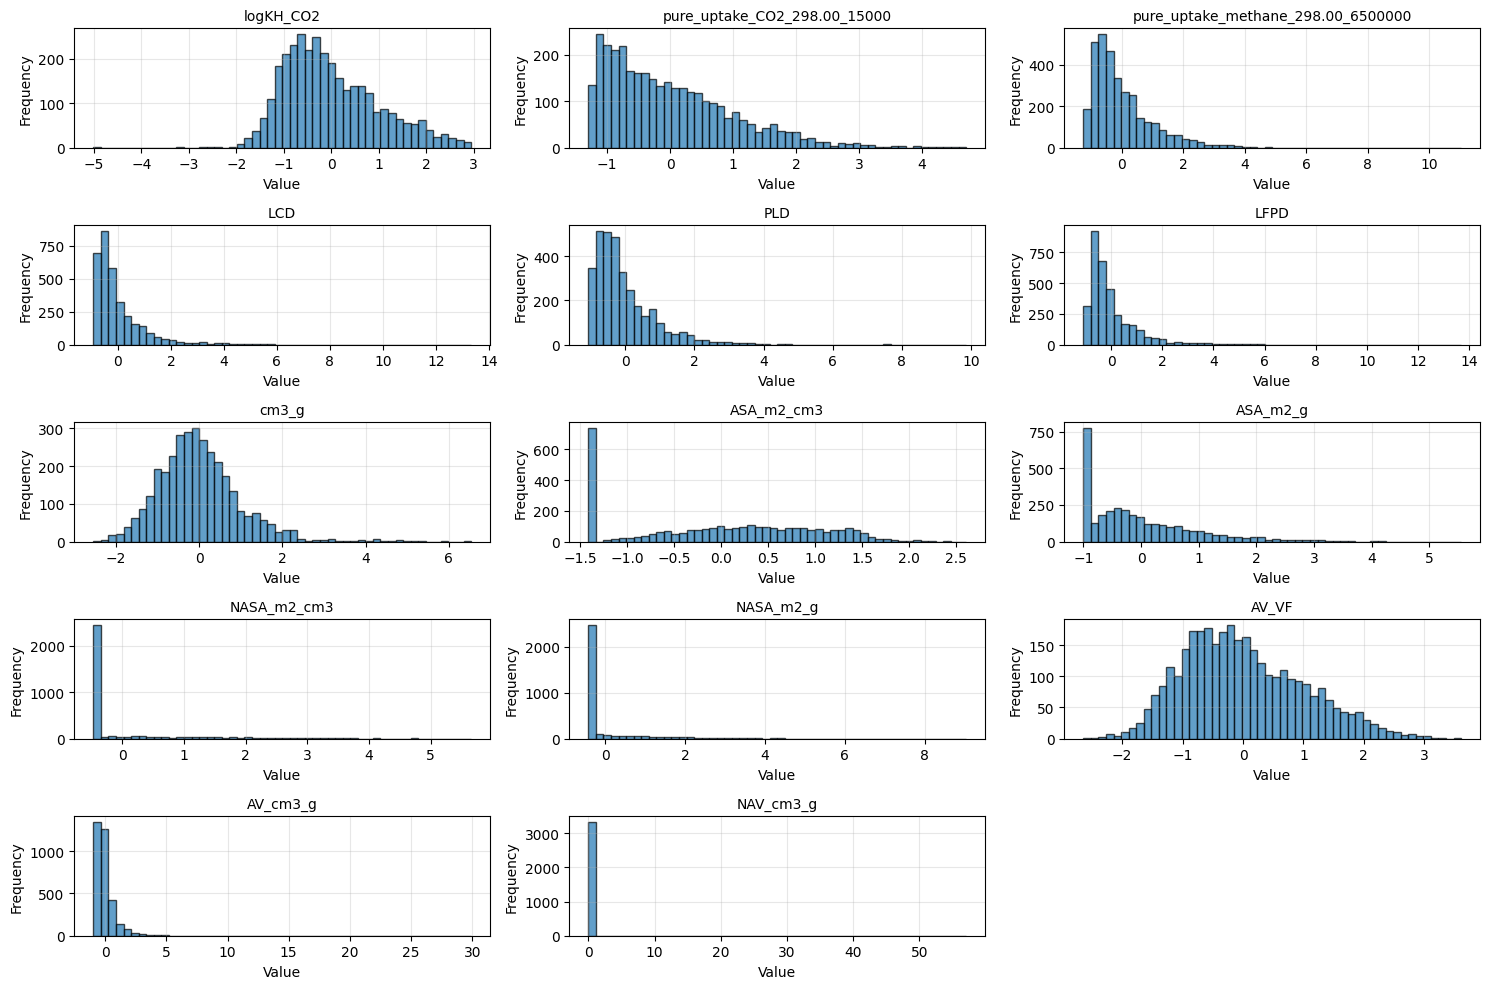

In [31]:
# Plotting distributions of numerical features of df_mofs_v1 (before standardization)

plot_feature_distributions(df_mofs_v1)

# Plotting distributions of numerical features of df_mofs_v3 (after standardization)

plot_feature_distributions(df_mofs_v3)


In [32]:
# Saving as csv

df_mofs_v3.to_csv(r'C:\Users\dalja\OneDrive\Desktop\APS360 Project\MOF_processed data\df_mofs_v3.csv', index=False)

In [33]:
# Saving as parquet

df_mofs_v3.to_parquet(r'C:\Users\dalja\OneDrive\Desktop\APS360 Project\MOF_processed data\df_mofs_v3.parquet', engine="pyarrow", index=False)

In [34]:
import re
import pandas as pd
from collections import Counter

# 1) 원소 심볼만 뽑기 (괄호/콤마/산화수/공백 무시)
def parse_metals(val):
    if val is None or (isinstance(val, float) and pd.isna(val)):
        return []
    s = " ".join(val) if isinstance(val, (list, tuple)) else str(val)
    toks = re.findall(r'[A-Z][a-z]?', s)  # Zn, Ni, Co 등
    return toks

# 2) 두 가지 비교 키
def key_multiset(val):  # 순서 무시 + 개수 동일해야 같음
    c = Counter(parse_metals(val))
    return tuple(sorted(c.items()))  # 예: (('Ni',1),('Zn',1))

def key_set(val):      # 순서만 무시(중복 무시)
    return tuple(sorted(set(parse_metals(val))))  # 예: ('Ni','Zn')

# --- 여기서 “같은지”만 판정 ---------------------------------------------

# (A) 중복까지 동일해야 true (권장: 금속 수가 의미 있을 때)
eq_mask = df_mofs_v3['All_Metals'].apply(key_multiset).eq(
          df_mofs_v3['metal'].apply(key_multiset))

# (B) 존재 원소만 같으면 true (중복 무시)
# eq_mask = df_mofs_v3['All_Metals'].apply(key_set).eq(
#           df_mofs_v3['metal'].apply(key_set))

n_total = len(df_mofs_v3)
n_diff  = (~eq_mask).sum()

print(f"✅ 동일: {n_total-n_diff} / {n_total}")
print(f"❌ 다른 행: {n_diff}")

# 서로 다른 행 몇 개만 보기
if n_diff:
    print(df_mofs_v3.loc[~eq_mask, ['All_Metals','metal']].head(10))


✅ 동일: 3270 / 3333
❌ 다른 행: 63
    All_Metals metal
145      Cu,Si  [Cu]
269      Cu,Si  [Cu]
278      Zn,Si  [Zn]
310         Zn  [Cu]
339      Mg,Si  [Mg]
340      Si,Co  [Co]
341      Ca,Si  [Ca]
522      Ag,Si  [Ag]
667      Cd,Si  [Cd]
668      Mn,Si  [Mn]


In [42]:
idx = df_mofs_v3['linker'].apply(len).idxmax()

print(len(df_mofs_v3.loc[idx]['linker_ids']))


198


In [45]:
# Linker 길이 분포 확인
df = pd.read_parquet(r'C:\Users\dalja\OneDrive\Desktop\APS360 Project\MOF_processed data\df_mofs_v3.parquet')

linker_lengths = []
for linker_ids in df['linker_ids']:
    non_zero = [t for t in linker_ids if t != 0]
    linker_lengths.append(len(non_zero))

print(f"평균: {np.mean(linker_lengths):.1f}")
print(f"최소: {np.min(linker_lengths)}")
print(f"최대: {np.max(linker_lengths)}")
print(f"중간값: {np.median(linker_lengths):.1f}")

평균: 37.8
최소: 1
최대: 198
중간값: 30.0
